In [1]:
import sys
sys.path.append('..')

from helper_fun import *
import helper_fun
from Split_functions_classify.splits_two import *
from Split_functions_classify.splits_three import *
from Split_functions_classify.splits_ten import *

from Split_functions_regression.split_furthest_cluster import *
SEED = 42
seed_everything(SEED)

compounds = pd.read_csv('../COVID_MOONSHOT/compounds_filtered.csv')
compounds.head(2)

/home/alex/miniforge3/envs/my-rdkit-env-covid/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-06 10:08:10.780480: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-06 10:08:11.021162: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427
1,36,O=C(Cc1cncc2ccccc12)Nc1ccccc1,DAR-DIA-23aa0b97-20,57.590417,45.077469,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac3530>,262.110613,2,1,3.41600,True,4.239650,4.346040


In [2]:
two_split(compounds)
three_split(compounds)
ten_split(compounds).head()



,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50,bin_2,bin_3,bin_10
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427,0,medium,2
1,36,O=C(Cc1cncc2ccccc12)Nc1ccccc1,DAR-DIA-23aa0b97-20,57.590417,45.077469,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac3530>,262.110613,2,1,3.41600,True,4.239650,4.346040,0,medium,1
2,126,Cc1c(N)cncc1NC(=O)Cc1cccc(Cl)c1,TRY-UNI-714a760b-3,4.222340,8.201698,<rdkit.Chem.rdchem.Mol object at 0x7fc31a435d20>,275.082540,3,2,2.80682,True,5.374447,5.086096,1,medium,5
3,129,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,TRY-UNI-714a760b-6,24.581194,13.895165,<rdkit.Chem.rdchem.Mol object at 0x7fc31a435e70>,260.071641,2,1,3.22462,True,4.609397,4.857136,0,medium,2
4,135,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,TRY-UNI-714a760b-12,64.508813,45.689263,<rdkit.Chem.rdchem.Mol object at 0x7fc31a436110>,261.066890,2,2,3.68742,True,4.190381,4.340186,0,medium,1


In [3]:
compound_df = compounds.copy()
compound_df["maccs"] = compound_df["SMILES"].apply(smiles_to_fp,)

In [4]:
fingerprint_to_model = compound_df.maccs.tolist()

# Bins 2 #

In [5]:
#change variables to _2 at end
label_to_model_2 = compound_df.bin_2.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_2,
    static_test_x_2,
    static_train_y_2,
    static_test_y_2,
) = train_test_split(fingerprint_to_model, label_to_model_2, test_size=0.2, random_state=SEED)
splits_2 = [static_train_x_2, static_test_x_2, static_train_y_2, static_test_y_2]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_2))
print("Test data size:", len(static_test_x_2))


# Set model parameter for random forest
param_2 = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF_2 = RandomForestClassifier(**param_2)

Training data size: 476
Test data size: 119


In [6]:
performance_measures = model_training_and_validation(model_RF_2, "RF", splits_2)

Sensitivity: 0.87
Specificity: 0.76
AUC: 0.89


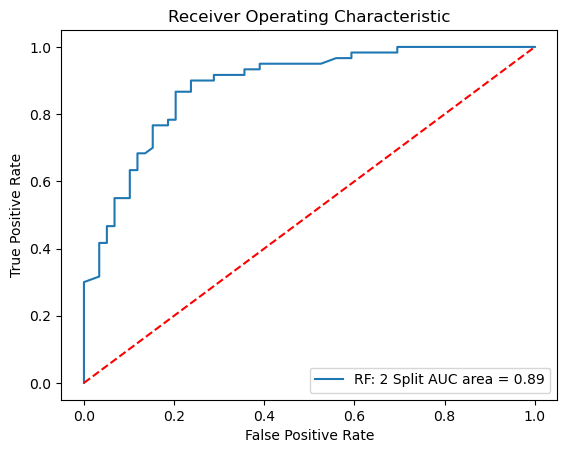

In [7]:
models = [{"label": "RF: 2 Split", "model": model_RF_2}]
plot_roc_curves_for_models(models, static_test_x_2, static_test_y_2,False);

In [8]:
from sklearn.metrics import classification_report

classification_report_dict_2 = classification_report(static_test_y_2, model_RF_2.predict(static_test_x_2), output_dict=True)


In [9]:
RF_eval = {}

In [10]:

roc_auc_score(static_test_y_2, model_RF_2.predict_proba(static_test_x_2)[:, 1])

0.8854519774011299

In [11]:
RF_eval["RF binary"] = {"AUC": roc_auc_score(static_test_y_2, model_RF_2.predict_proba(static_test_x_2)[:, 1]), "micro F1": classification_report_dict_2["accuracy"], "Precision Macro": classification_report_dict_2["macro avg"]["precision"], "Recall Macro": classification_report_dict_2["macro avg"]["recall"],"MCC": matthews_corrcoef(static_test_y_2, model_RF_2.predict(static_test_x_2)),"Balanced MCC": balanced_MCC_macro_avg(static_test_y_2, model_RF_2.predict(static_test_x_2))}

In [12]:
pd.DataFrame(RF_eval).T

,AUC,micro F1,Precision Macro,Recall Macro,MCC,Balanced MCC
RF binary,0.885452,0.815126,0.818468,0.814689,0.633146,0.632807


### Now look at our RF bin 2 model after hyper-parameter tuning ###

In [13]:
from joblib import load

In [14]:
Optuna_model_RF_2 = load('Optuna_model_RF_2.pkl')

In [15]:
Optuna_model_RF_2.fit(static_train_x_2, static_train_y_2)

RandomForestClassifier(max_depth=21, n_estimators=14, random_state=42)

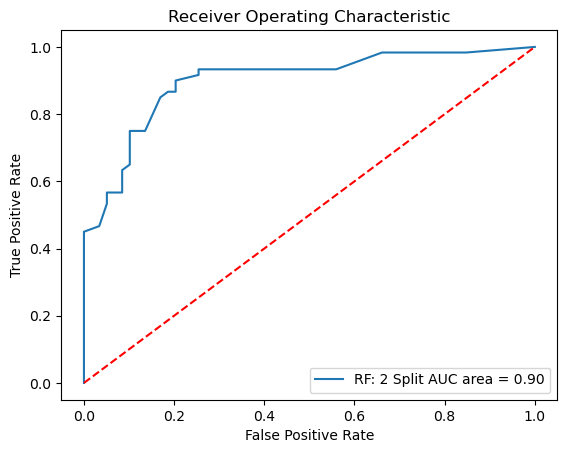

In [16]:
models = [{"label": "RF: 2 Split", "model": Optuna_model_RF_2}]
plot_roc_curves_for_models(models, static_test_x_2, static_test_y_2,False);


In [17]:
f1_score_2 = f1_score(static_test_y_2, Optuna_model_RF_2.predict(static_test_x_2))  
print("Our f1 score is: ", f1_score_2)

Our f1 score is:  0.8429752066115702


In [18]:
matthews_corrcoef_2 = matthews_corrcoef(static_test_y_2, Optuna_model_RF_2.predict(static_test_x_2))
print("Our matthews_corrcoef is: ", matthews_corrcoef_2)

Our matthews_corrcoef is:  0.6807007901021046


In [19]:
classification_report_dict_2_optuna = classification_report(static_test_y_2, Optuna_model_RF_2.predict(static_test_x_2), output_dict=True)

This is looking like a strong classifier model

In [20]:
RF_eval["RF binary optuna"] = {"AUC": roc_auc_score(static_test_y_2, Optuna_model_RF_2.predict_proba(static_test_x_2)[:, 1]), "micro F1": classification_report_dict_2_optuna["accuracy"], "Precision Macro": classification_report_dict_2_optuna["macro avg"]["precision"], "Recall Macro": classification_report_dict_2_optuna["macro avg"]["recall"],"MCC": matthews_corrcoef(static_test_y_2, Optuna_model_RF_2.predict(static_test_x_2)),"Balanced MCC": balanced_MCC_macro_avg(static_test_y_2, Optuna_model_RF_2.predict(static_test_x_2))}

In [21]:
pd.DataFrame(RF_eval).T

,AUC,micro F1,Precision Macro,Recall Macro,MCC,Balanced MCC
RF binary,0.885452,0.815126,0.818468,0.814689,0.633146,0.632807
RF binary optuna,0.898870,0.840336,0.840447,0.840254,0.680701,0.680638


# Bins 3 #

In [22]:
#change variables to _3 at end
label_to_model_3 = compound_df.bin_3.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_3,
    static_test_x_3,
    static_train_y_3,
    static_test_y_3,
) = train_test_split(fingerprint_to_model, label_to_model_3, test_size=0.2, random_state=SEED)
splits_3 = [static_train_x_3, static_test_x_3, static_train_y_3, static_test_y_3]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_3))
print("Test data size:", len(static_test_x_3))


# Set model parameter for random forest
param_3 = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF_3 = RandomForestClassifier(**param_3)

Training data size: 476
Test data size: 119


In [23]:
bins_label_3 = ['low','medium','high']
model_RF_3.fit(static_train_x_3,static_train_y_3)
test_prob_RF_3 = model_RF_3.predict_proba(static_test_x_3)

### Plot the ROC curves using One vs Rest and micro-averaging ###

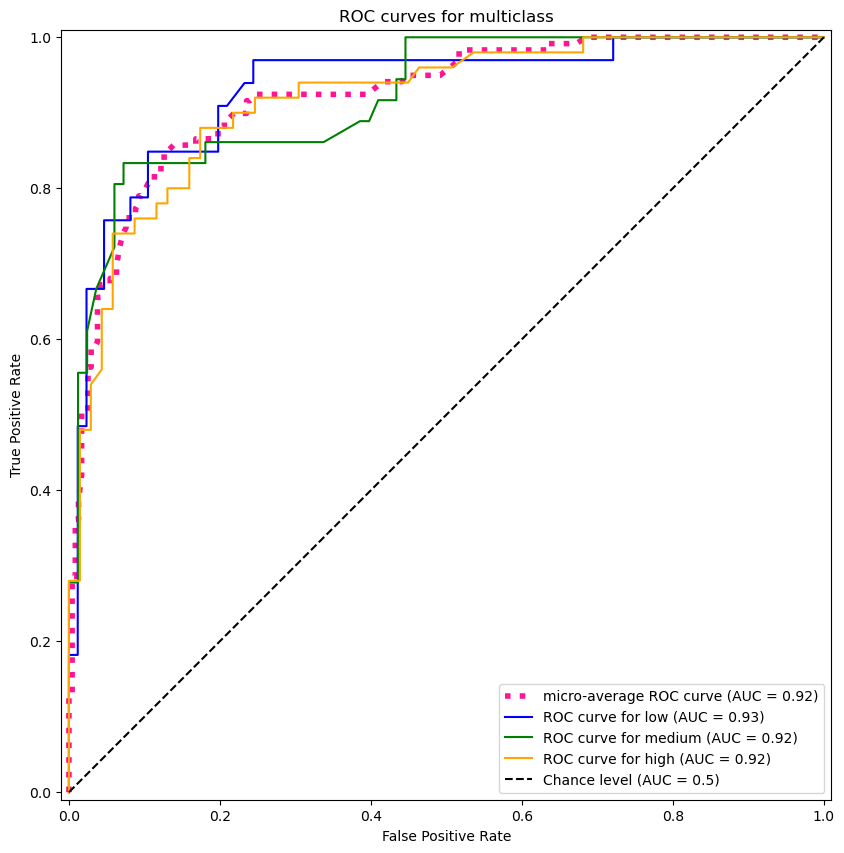

In [24]:
plot_roc_for_multi_class(model_RF_3,static_test_x_3,static_train_y_3,static_test_y_3,bins_label_3,True,True)

### MCC for 3 classes ###

In [25]:
y_pred_RF_3 = model_RF_3.predict(static_test_x_3)
matthews_corrcoef_RF_3 = matthews_corrcoef(static_test_y_3,y_pred_RF_3)
print("MCC:",matthews_corrcoef_RF_3)

MCC: 0.6996772329257254


### F1 for multi-class (3 classes here) ###

Have to specify average as this is not a binary class

In [26]:
f1_score_RF_3 = f1_score(static_test_y_3,y_pred_RF_3,average="micro")
print("F1 score using micro average is:",f1_score_RF_3)

F1 score using micro average is: 0.7983193277310925


In [27]:
f1_score_RF_3 = f1_score(static_test_y_3,y_pred_RF_3,average="macro")
print("F1 score using macro average is:",f1_score_RF_3)

F1 score using macro average is: 0.7966277147673524


In [38]:
classification_report_dict_3 = classification_report(static_test_y_3, model_RF_3.predict(static_test_x_3), output_dict=True)
print(pd.DataFrame(classification_report_dict_3).T)

              precision    recall  f1-score     support
high           0.700000  0.848485  0.767123   33.000000
low            0.805556  0.805556  0.805556   36.000000
medium         0.883721  0.760000  0.817204   50.000000
accuracy       0.798319  0.798319  0.798319    0.798319
macro avg      0.796425  0.804680  0.796628  119.000000
weighted avg   0.809126  0.798319  0.799792  119.000000


In [51]:
RF_eval["RF 3 classes"] = {"AUC": roc_auc_score(static_test_y_3, model_RF_3.predict_proba(static_test_x_3),multi_class="ovr",average="micro"), "micro F1": classification_report_dict_3["accuracy"], "Precision Macro": classification_report_dict_3["macro avg"]["precision"], "Recall Macro": classification_report_dict_3["macro avg"]["recall"],"MCC": matthews_corrcoef(static_test_y_3, model_RF_3.predict(static_test_x_3)),"Balanced MCC": balanced_MCC_macro_avg(static_test_y_3, model_RF_3.predict(static_test_x_3))}

In [47]:
pd.DataFrame(RF_eval).T

,AUC,micro F1,Precision Macro,Recall Macro,MCC,Balanced MCC
RF binary,0.885452,0.815126,0.818468,0.814689,0.633146,0.632807
RF binary optuna,0.898870,0.840336,0.840447,0.840254,0.680701,0.680638
RF 3 classes,0.922984,0.798319,0.796425,0.804680,0.699677,0.710675


### Look at RF bin 3 after Optuna ###

In [28]:
Optuna_model_RF_3 = load('Optuna_model_RF_3.pkl')
Optuna_model_RF_3.fit(static_train_x_3, static_train_y_3)

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=30,
                       random_state=42)

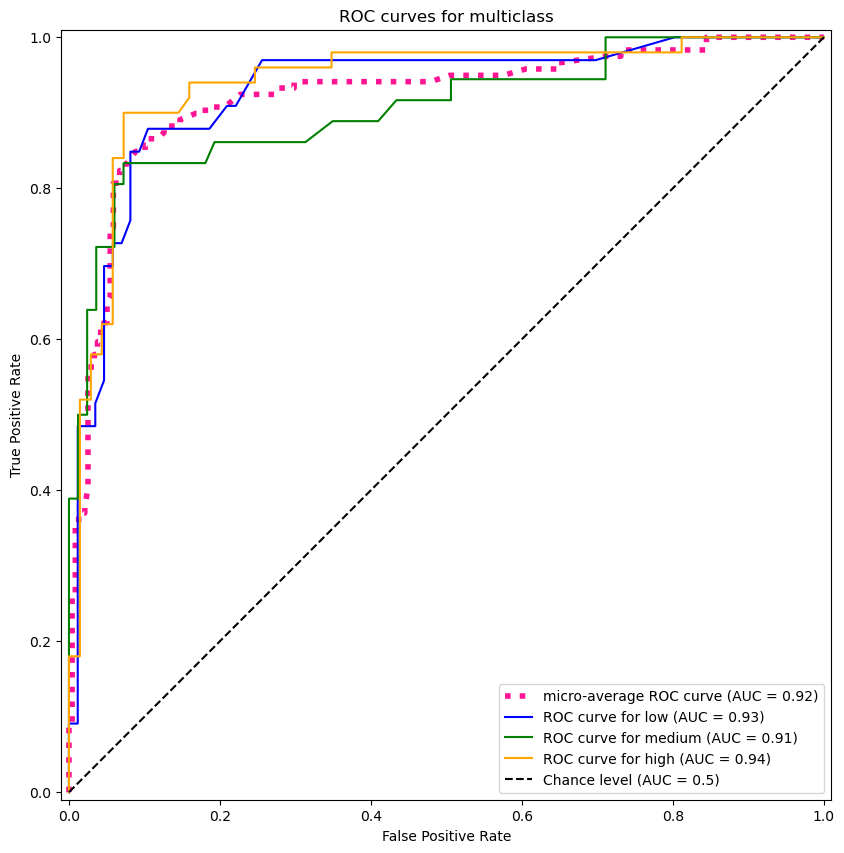

In [29]:
plot_roc_for_multi_class(Optuna_model_RF_3,static_test_x_3,static_train_y_3,static_test_y_3,bins_label_3,True,True)

We use micro-averaging here

In [30]:
f1_score_3 = f1_score(static_test_y_3, Optuna_model_RF_3.predict(static_test_x_3),average="micro")
print("Our f1 score is: ", f1_score_3)

Our f1 score is:  0.8487394957983193


We see an improvement in our f1 score after the hyper-parameter tuning

In [31]:
matthews_corrcoef_3 = matthews_corrcoef(static_test_y_3, Optuna_model_RF_3.predict(static_test_x_3))
print("Our matthews_corrcoef is: ", matthews_corrcoef_3)

Our matthews_corrcoef is:  0.7707794264577351


In [34]:
classification_report_dict_3_optuna = classification_report(static_test_y_3, Optuna_model_RF_3.predict(static_test_x_3),target_names=bins_label_3,output_dict=True)

In [53]:
RF_eval["RF 3 classes optuna"] = {"AUC": roc_auc_score(static_test_y_3, Optuna_model_RF_3.predict_proba(static_test_x_3),multi_class="ovr",average="micro"), "micro F1": classification_report_dict_3_optuna["accuracy"], "Precision Macro": classification_report_dict_3_optuna["macro avg"]["precision"], "Recall Macro": classification_report_dict_3_optuna["macro avg"]["recall"],"MCC": matthews_corrcoef(static_test_y_3, Optuna_model_RF_3.predict(static_test_x_3)),"Balanced MCC": balanced_MCC_macro_avg(static_test_y_3, Optuna_model_RF_3.predict(static_test_x_3))}

In [54]:
pd.DataFrame(RF_eval).T

,AUC,micro F1,Precision Macro,Recall Macro,MCC,Balanced MCC
RF binary,0.885452,0.815126,0.818468,0.814689,0.633146,0.632807
RF binary optuna,0.898870,0.840336,0.840447,0.840254,0.680701,0.680638
RF 3 classes,0.921616,0.798319,0.796425,0.804680,0.699677,0.710675
RF 3 classes optuna,0.920927,0.848739,0.849918,0.845522,0.770779,0.773193


In [103]:
from sklearn.inspection import permutation_importance

feature_names = [f"feature {i}" for i in range(compound_df.maccs[0].shape[0])]
result = permutation_importance(Optuna_model_RF_3, static_test_x_3, static_test_y_3, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)
forest_importances_std = pd.Series(result.importances_std, index=feature_names)

In [118]:
forest_importances_sorted = forest_importances.sort_values(ascending=False)
forest_importances_sorted_index_20 = forest_importances_sorted[:20].index.to_list()
forest_importances_std_sorted = np.array([forest_importances_std[i] for i in forest_importances_sorted_index_20])

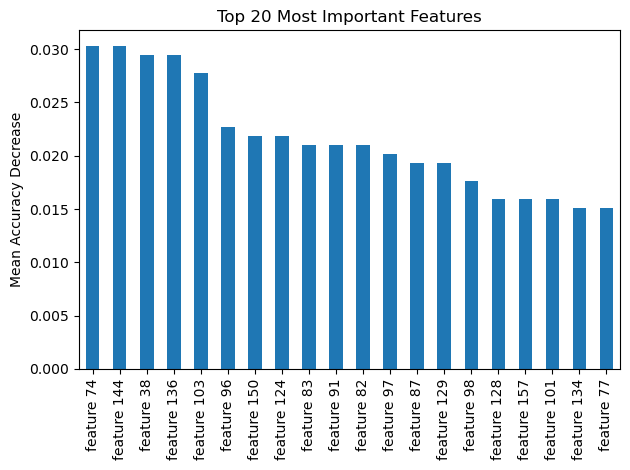

In [124]:
fig, ax = plt.subplots()
forest_importances_sorted[:20].plot.bar(ax=ax)
ax.set_title("Top 20 Most Important Features")
ax.set_ylabel("Mean Accuracy Decrease")
fig.tight_layout()
plt.show()

In [ ]:
result.importances_std

# Test on furthest cluster #

We define our model using the parameters we got from Optuna

In [56]:
model_RF_3 = load('Optuna_model_RF_3_furth.pkl')

Create our furthest cluster splits

In [57]:
X_train_3_furth, X_test_3_furth, Y_train_3_furth, Y_test_3_furth = furthest_cluster_split(compounds, smiles_column="SMILES", CID_column="CID", pIC50_column="bin_3")

Now train our model on the most similar compounds

In [58]:
X_train_3_furth = X_train_3_furth.to_list()
Y_train_3_furth = Y_train_3_furth.to_list()
X_test_3_furth = X_test_3_furth.to_list()
Y_test_3_furth = Y_test_3_furth.to_list()

In [59]:
model_RF_3.fit(X_train_3_furth, Y_train_3_furth)

RandomForestClassifier(max_depth=22, max_features=None, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=28, random_state=42)

### See how this model performs on the test set, furthest cluster ###

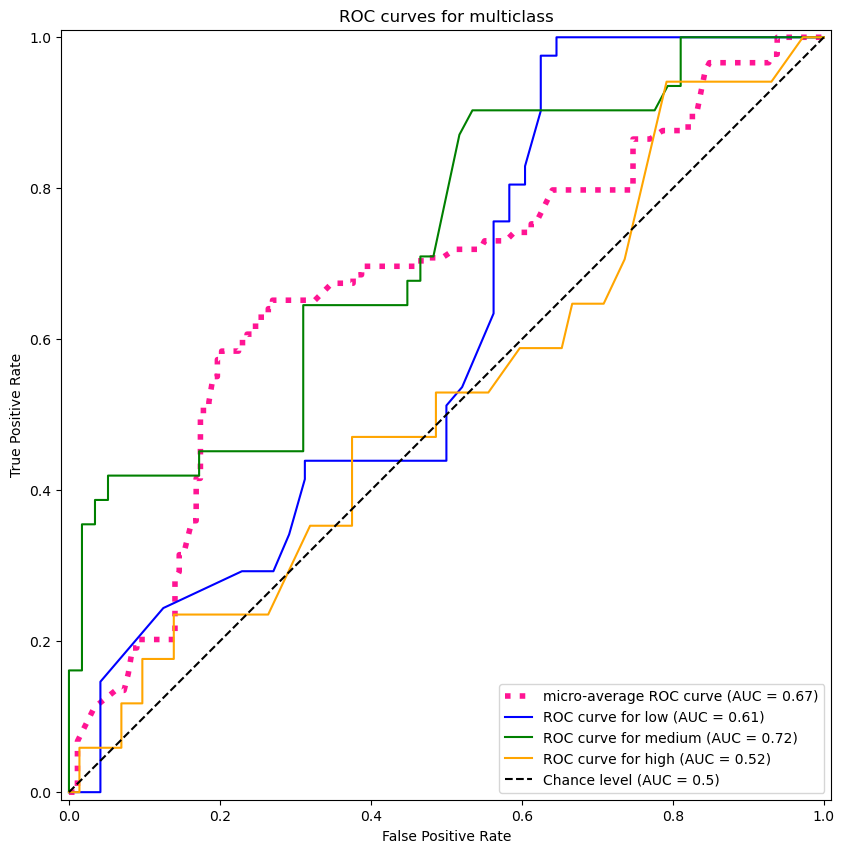

In [60]:
plot_roc_for_multi_class(model_RF_3,X_test_3_furth,Y_train_3_furth,Y_test_3_furth,bins_label_3,True,True)

The model is very bad at determining the high bin, this is likely due to the fact that there are very few high bin values in the dataset. This is a common problem in classification problems where the classes are imbalanced.

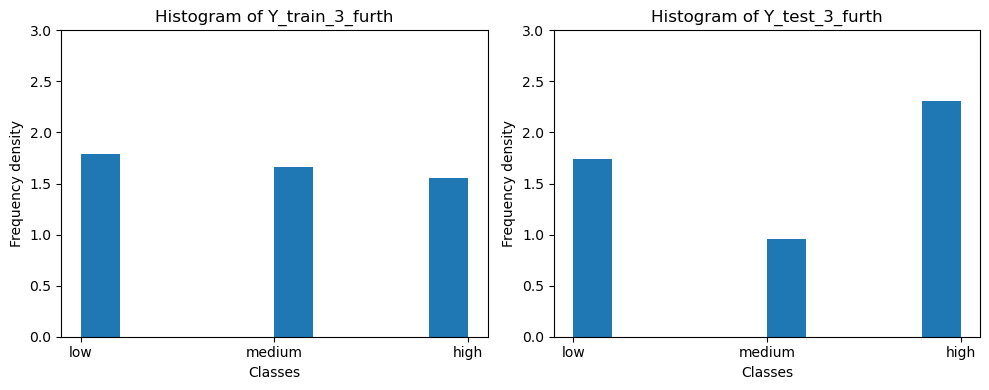

In [61]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(Y_train_3_furth,density=True)
ax1.set_xlabel('Classes')
ax1.set_ylabel('Frequency density')
ax1.set_title('Histogram of Y_train_3_furth')
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['low', 'medium', 'high'])
ax1.set_ylim(0, 3.0)
ax2.set_ylim(0, 3.0)
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['low', 'medium', 'high'])

ax2.hist(Y_test_3_furth,density=True)
ax2.set_xlabel('Classes')
ax2.set_ylabel('Frequency density')
ax2.set_title('Histogram of Y_test_3_furth')

plt.tight_layout()
plt.show()

In [62]:
classification_report_dict_3_furth_optuna = classification_report(Y_test_3_furth, model_RF_3.predict(X_test_3_furth),target_names=bins_label_3,output_dict=True)

In [63]:
RF_eval["RF 3 classes optuna furthest cluster"] = {"AUC": roc_auc_score(Y_test_3_furth, model_RF_3.predict_proba(X_test_3_furth),multi_class="ovr",average="micro"), "micro F1": classification_report_dict_3_furth_optuna["accuracy"], "Precision Macro": classification_report_dict_3_furth_optuna["macro avg"]["precision"], "Recall Macro": classification_report_dict_3_furth_optuna["macro avg"]["recall"],"MCC": matthews_corrcoef(Y_test_3_furth, model_RF_3.predict(X_test_3_furth)),"Balanced MCC": balanced_MCC_macro_avg(Y_test_3_furth, model_RF_3.predict(X_test_3_furth))}

In [64]:
pd.DataFrame(RF_eval).T

,AUC,micro F1,Precision Macro,Recall Macro,MCC,Balanced MCC
RF binary,0.885452,0.815126,0.818468,0.814689,0.633146,0.632807
RF binary optuna,0.898870,0.840336,0.840447,0.840254,0.680701,0.680638
RF 3 classes,0.921616,0.798319,0.796425,0.804680,0.699677,0.710675
RF 3 classes optuna,0.920927,0.848739,0.849918,0.845522,0.770779,0.773193
RF 3 classes optuna furthest cluster,0.671127,0.584270,0.523775,0.468336,0.324534,0.267382


This is really not looking good and shows that we must have some serious over-fitting for our model to be looking so good on our random 80/20 split

## Using Shap to see what features in maccs are having a big impact on our data ##

In [ ]:
import shap

In [ ]:
X_train_df = pd.DataFrame(X_train_3_furth, columns=[f'feature_{i}' for i in range(len(X_train_3_furth[0]))])
X_test_df = pd.DataFrame(X_test_3_furth, columns=[f'feature_{i}' for i in range(len(X_test_3_furth[0]))])
y_train_df = np.array(Y_train_3_furth)
y_test_df = np.array(Y_test_3_furth)

In [ ]:
explainer = shap.TreeExplainer(model_RF_3)
shap_values = explainer(X_test_df)



# Bins 10 #

In [65]:
#change variables to _10 at end
label_to_model_10 = compound_df.bin_10.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_10,
    static_test_x_10,
    static_train_y_10,
    static_test_y_10,
) = train_test_split(fingerprint_to_model, label_to_model_10, test_size=0.2, random_state=SEED)
splits_10 = [static_train_x_10, static_test_x_10, static_train_y_10, static_test_y_10]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_10))
print("Test data size:", len(static_test_x_10))


# Set model parameter for random forest
param_10 = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF_10 = RandomForestClassifier(**param_10)

Training data size: 476
Test data size: 119


In [66]:
bins_label_10 = ['0','1','2','3','4','5','6','7','8','9']
model_RF_10.fit(static_train_x_10,static_train_y_10)
test_prob_RF_10 = model_RF_10.predict_proba(static_test_x_10)

### Plot the ROC curves using One vs Rest and micro-averaging ###

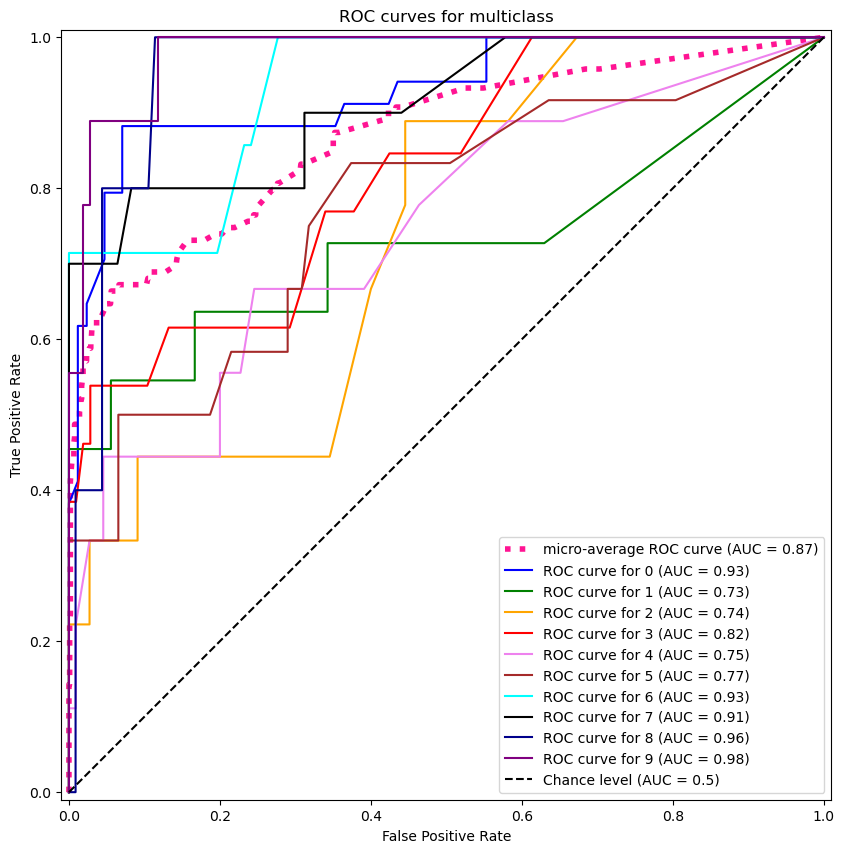

In [67]:
plot_roc_for_multi_class(model_RF_10,static_test_x_10,static_train_y_10,static_test_y_10,bins_label_10,True,True)

### MCC for 10 classes ###

In [68]:
y_pred_RF_10 = model_RF_10.predict(static_test_x_10)
matthews_corrcoef_RF_10 = matthews_corrcoef(static_test_y_10,y_pred_RF_10)
print("MCC:",matthews_corrcoef_RF_10)

MCC: 0.5583985119817111


### F1 for multi-class 10 classes here ###

Have to specify average as this is not a binary class

In [69]:
f1_score_RF_10 = f1_score(static_test_y_10,y_pred_RF_10,average="micro")
print("F1 score using micro average is:",f1_score_RF_10)

F1 score using micro average is: 0.6218487394957983


In [70]:
f1_score_RF_10 = f1_score(static_test_y_10,y_pred_RF_10,average="macro")
print("F1 score using macro average is:",f1_score_RF_10)

F1 score using macro average is: 0.560441260665719


In [71]:
classification_report_dict_10 = classification_report(static_test_y_10, model_RF_10.predict(static_test_x_10), output_dict=True)

In [74]:
RF_eval["RF 10 classes"] = {"AUC": roc_auc_score(static_test_y_10, model_RF_10.predict_proba(static_test_x_10),multi_class="ovr",average="micro"), "micro F1": classification_report_dict_10["accuracy"], "Precision Macro": classification_report_dict_10["macro avg"]["precision"], "Recall Macro": classification_report_dict_10["macro avg"]["recall"],"MCC": matthews_corrcoef(static_test_y_10, model_RF_10.predict(static_test_x_10)),"Balanced MCC": balanced_MCC_macro_avg(static_test_y_10, model_RF_10.predict(static_test_x_10))}

### RF 10 bin after Optuna ###

In [72]:
Optuna_model_RF_10 = load('Optuna_model_RF_10.pkl')
Optuna_model_RF_10.fit(static_train_x_10, static_train_y_10)

RandomForestClassifier(max_depth=17, min_samples_split=3, n_estimators=180,
                       random_state=42)

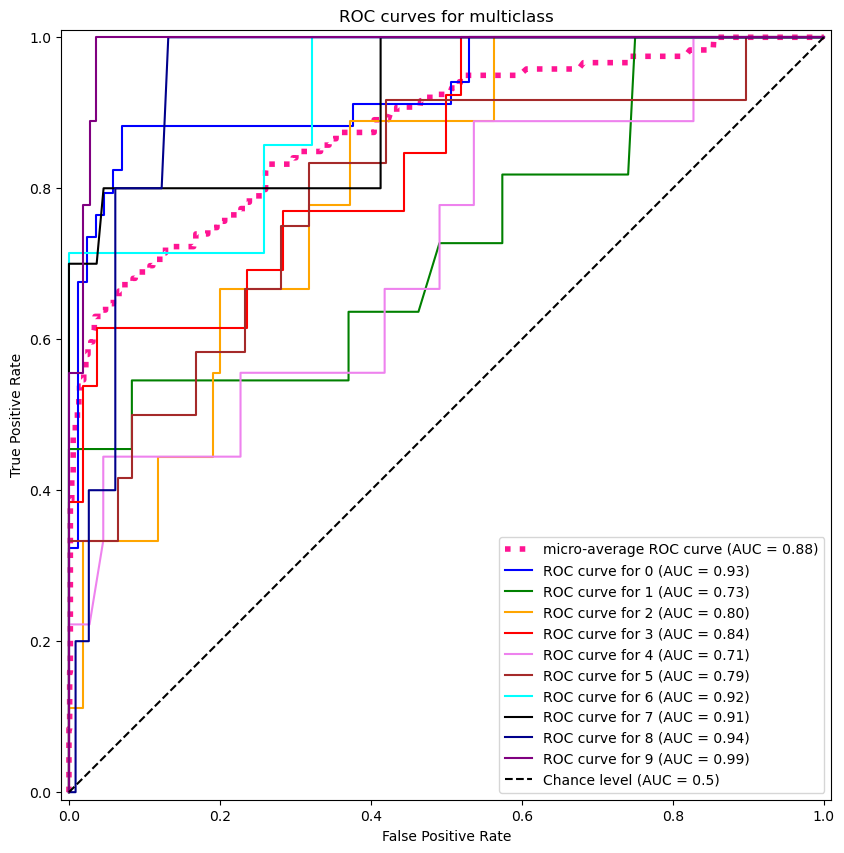

In [73]:
plot_roc_for_multi_class(Optuna_model_RF_10,static_test_x_10,static_train_y_10,static_test_y_10,bins_label_10,True,True)

We use micro-averaging here

In [76]:
f1_score_10 = f1_score(static_test_y_10, Optuna_model_RF_10.predict(static_test_x_10),average="micro")
print("Our f1 score is: ", f1_score_10)

Our f1 score is:  0.6218487394957983


In [77]:
matthews_corrcoef_10 = matthews_corrcoef(static_test_y_10, Optuna_model_RF_10.predict(static_test_x_10))
print("Our matthews_corrcoef is: ", matthews_corrcoef_10)

Our matthews_corrcoef is:  0.5584607685405089


In [78]:
classification_report_dict_10_optuna = classification_report(static_test_y_10, Optuna_model_RF_10.predict(static_test_x_10),target_names=bins_label_10,output_dict=True)

In [79]:
RF_eval["RF 10 classes optuna"] = {"AUC": roc_auc_score(static_test_y_10, Optuna_model_RF_10.predict_proba(static_test_x_10),multi_class="ovr",average="micro"), "micro F1": classification_report_dict_10_optuna["accuracy"], "Precision Macro": classification_report_dict_10_optuna["macro avg"]["precision"], "Recall Macro": classification_report_dict_10_optuna["macro avg"]["recall"],"MCC": matthews_corrcoef(static_test_y_10, Optuna_model_RF_10.predict(static_test_x_10)),"Balanced MCC": balanced_MCC_macro_avg(static_test_y_10, Optuna_model_RF_10.predict(static_test_x_10))}

In [80]:
pd.DataFrame(RF_eval).T

,AUC,micro F1,Precision Macro,Recall Macro,MCC,Balanced MCC
RF binary,0.885452,0.815126,0.818468,0.814689,0.633146,0.632807
RF binary optuna,0.898870,0.840336,0.840447,0.840254,0.680701,0.680638
RF 3 classes,0.921616,0.798319,0.796425,0.804680,0.699677,0.710675
RF 3 classes optuna,0.920927,0.848739,0.849918,0.845522,0.770779,0.773193
RF 3 classes optuna furthest cluster,0.671127,0.584270,0.523775,0.468336,0.324534,0.267382
RF 10 classes,0.868606,0.621849,0.590786,0.566742,0.558399,0.570854
RF 10 classes optuna,0.876708,0.621849,0.611990,0.551657,0.558461,0.556821
